             s_adjclose   moving_avg  l/s_signal buy_or_sell  buy_or_sell2  \
Date                                                                         
2019-07-18  1977.900024  1884.835203   93.064822        long     78.749817   
2019-07-19  1964.520020  1885.770203   78.749817        long     98.144602   
2019-07-22  1985.630005  1887.485403   98.144602        long    104.914387   
2019-07-23  1994.489990  1889.575603  104.914387        long    107.671855   
2019-07-24  2000.810059  1893.138203  107.671855        long     78.007744   
2019-07-25  1973.819946  1895.812202   78.007744        long     45.799846   
2019-07-26  1943.050049  1897.250203   45.799846        long     15.102148   
2019-07-29  1912.449951  1897.347803   15.102148        long      0.591626   
2019-07-30  1898.530029  1897.938403    0.591626        long    -31.314575   
2019-07-31  1866.780029  1898.094604  -31.314575       short    -42.730657   
2019-08-01  1855.319946  1898.050603  -42.730657       short    

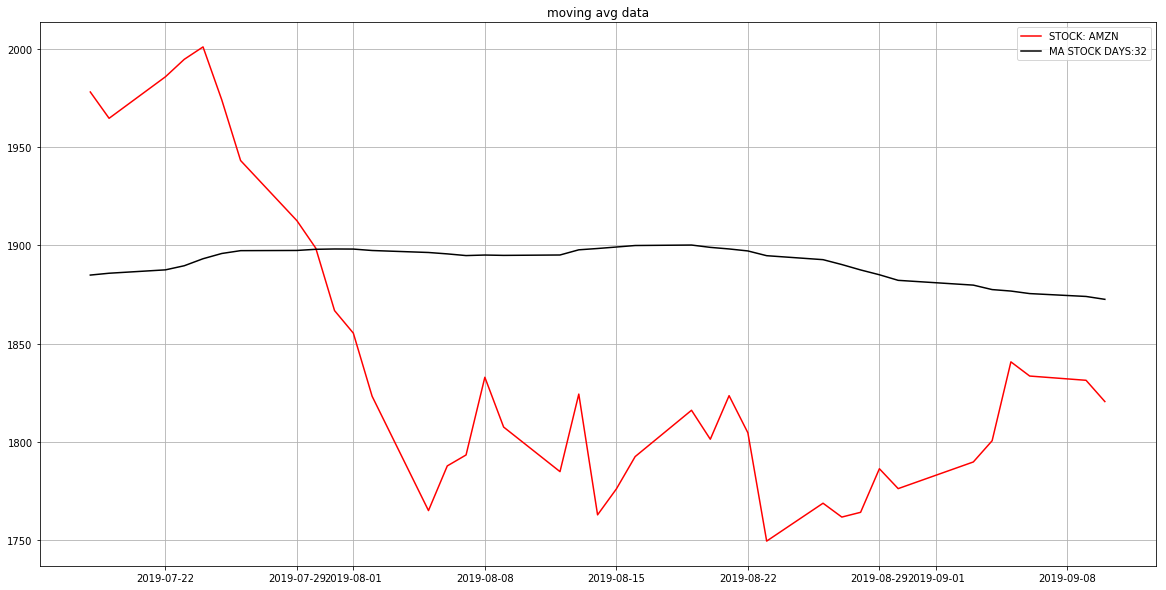

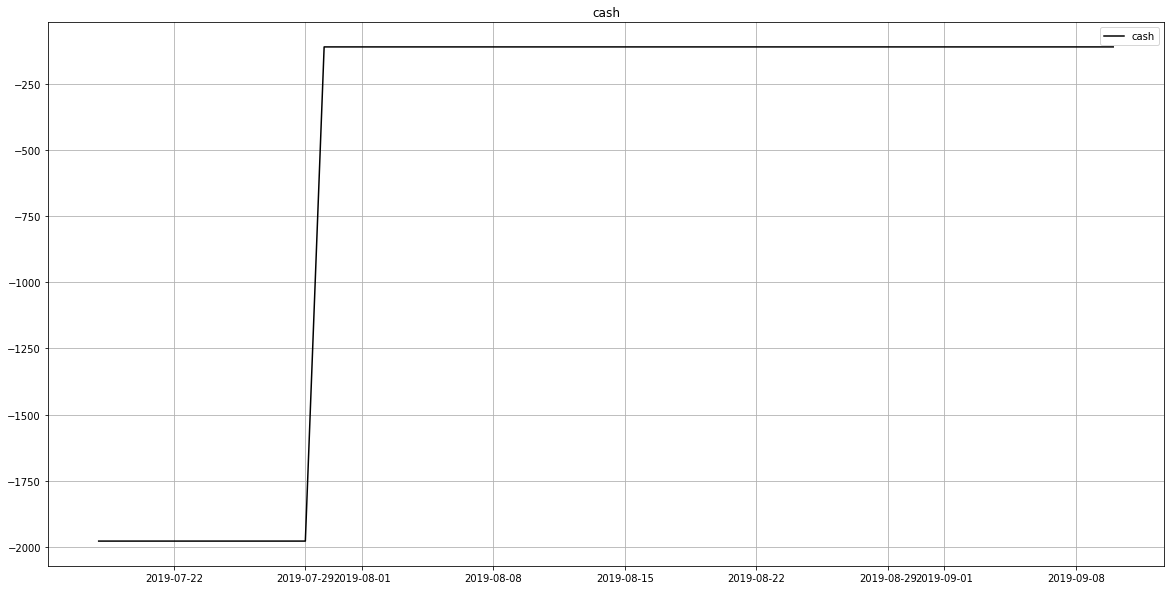

In [410]:
import pandas_datareader as pdr
from pandas_datareader import data, wb
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', 999)

def movavg(start_date, end_date, ticker1, ticker2):
    #get the data from Yahoo Finance
    stock1 = pdr.get_data_yahoo(ticker1, start_date, end_date)
    stock2 = pdr.get_data_yahoo(ticker2, start_date, end_date)
    #dt = pd.to_datetime(start_date, format='%Y/%m/%d') #
    #dt1 = pd.to_datetime(end_date, format='%Y/%m/%d')
    #day_tim= (dt1-dt).days
    #print(day_tim)
 
    return_stock1 = stock1.resample('W').last()
    return_stock2 = stock2.resample('W').last()
    #print(return_stock1)
    
    data = pd.DataFrame({'s_adjclose': stock1['Adj Close']}) #, 'mkt_adjclose': stock2['Adj Close']})#, index=return_stock1.index)
    #data = pd.DataFrame({'s_adjclose': stock1['Adj Close'], 'mkt_adjclose': stock2['Adj Close']})#, index=return_stock1.index)
    x=50
    #natural logarithm of the returns
    #data[['s_returns', 'm_returns']] = np.log(data[['s_adjclose','m_adjclose']]/data[['s_adjclose','m_adjclose']].shift(1))
    data['moving_avg'] = data['s_adjclose'].rolling(x).mean() 
    data['l/s_signal']=data['s_adjclose']-data['s_adjclose'].rolling(x).mean()
    data['buy_or_sell'] = data['l/s_signal'].apply(lambda x: 'long' if x >= 0 else 'short')
    data['buy_or_sell2'] = data['l/s_signal'].shift(-1)
    data['l/s_signal2'] = data['buy_or_sell2'].apply(lambda x: 'long' if x >= 0 else 'short')
    
    #initvalue = np.array(count_row, size=6)
    init_val = data['l/s_signal'].apply(lambda x: 1 if x >= 0 else -1)
    
       
    data['cost'] = np.where(data['buy_or_sell']==data['l/s_signal2'], 0, data['s_adjclose'].shift(-1))
    data['cost_adj'] = np.where(data['buy_or_sell']=='short',data['cost']*-1,data['cost'])
    
    data['cash']=np.cumsum(data['cost_adj'])
    
    i = data['cost_adj'] 
    data['count'] = i.ne(i.shift()).cumsum()


    data = data.dropna()
    
    print(data)
    export_csv = data.to_csv (r'C:\Users\IGreenstein\Documents\financesection\movavg.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path
    #print(init_value)
    #print(p_l)
    
    
    fig,axis = plt.subplots(1,figsize=(20,10))
    #plt.plot(data["s_adjclose"],label= 'stock 1',color='red')
    plt.plot(data['s_adjclose'],label= 'STOCK: %s'%s1,color='red')
    #plt.plot(data["norm_mkt_price"],label= 'normalized market',color='blue')
    plt.plot(data['moving_avg'],label= 'MA STOCK DAYS:%x'%x,color='black')
    plt.title('moving avg data')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    fig,axis = plt.subplots(1,figsize=(20,10))
    plt.plot(data['cash'],label= 'cash',color='black')
    plt.title('cash')
    plt.legend()
    plt.grid(True)
    plt.show()
    
if __name__ == "__main__":
    #using historical data 2010-2017: the market is the S&P500 !!!
    s1='AMZN'
    m1='^GSPC'
    movavg('2019-05-08', '2019-09-10',s1,m1)
    #plot_data(s1)  
    